In [1]:
import os
with open("성인여성_키_데이터.txt", "r") as f:
    data = f.read().split('\n')
    data = list(map(float, data))

In [3]:
# 정규성 검정
from scipy.stats import *
kstest(data, 'norm') # p-value가 0.0 < 0.05으로 정규성을 띈다고 볼 수 있음 

KstestResult(statistic=1.0, pvalue=0.0)

In [4]:
# 단일 표본 t 검정 수행
print(ttest_1samp(data, 163)) 

# pvalue가 0.05 미만이므로 영가설 (data의 평균 == 163) 기각
# 통계량이 음수이므로 data이 평균 < 163임을 알 수 있음

Ttest_1sampResult(statistic=-2.979804412662668, pvalue=0.006510445335847954)


In [6]:
#독립 표본 t 검정
import pandas as pd

df1 = pd.read_csv("반별_점수_type1.csv", engine = "python")
df1.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


In [7]:
group_A = df1['점수'].loc[df1['반'] == 'A'].values
group_B = df1['점수'].loc[df1['반'] == 'B'].values
# kstest를 이용한 정규성 검정: 모두 정규 분포를 띔을 확인
print(kstest(group_A, 'norm'))
print(kstest(group_B, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [8]:
# 등분산 검정
levene(group_A, group_B)  # pvalue가 0.05 미만이 아니므로, 등분산을 띈다고 볼 수 있음

LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

In [9]:
# A와 B간에는 차이가 존재함을 확인 
print(ttest_ind(group_A, group_B, equal_var = True))

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


#### 쌍체 표본 검정

In [10]:
df = pd.read_csv("다이어트약_효과검증.csv")
df.head()

,다이어트전(kg),다이어트후(kg)
0,87.41,88.30
1,81.05,76.21
2,60.72,53.34
3,81.02,78.21
4,75.75,76.74


In [11]:
before = df['다이어트전(kg)']
after = df['다이어트후(kg)']

# 정규성 검정
kstest(after - before, 'norm')

Ttest_relResult(statistic=9.70596986565785, pvalue=5.370404098342324e-13)

In [12]:
ttest_rel(before, after) # 확실한 양의 효과가 있음을 확인 

Ttest_relResult(statistic=9.70596986565785, pvalue=5.370404098342324e-13)

### 일원분산분석

In [13]:
df = pd.read_csv("지점별_일별판매량.csv", engine = "python")
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [14]:
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

([<matplotlib.axis.XTick at 0x29cf12dfb00>,
 [Text(1, 0, '지점 A'), Text(2, 0, '지점 B'), Text(3, 0, '지점 C')])

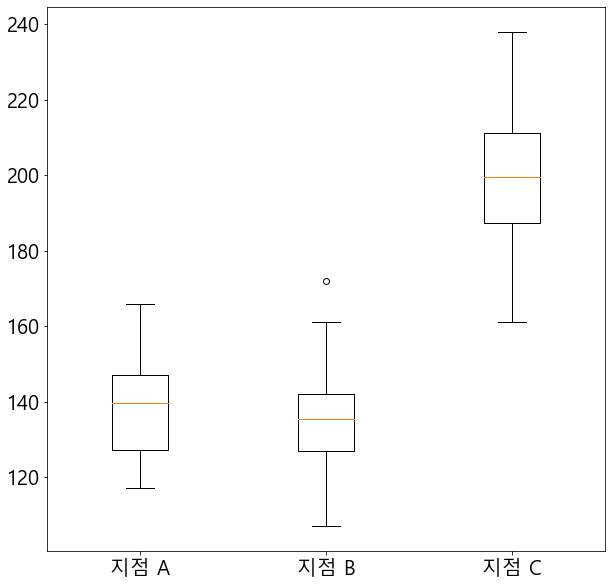

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)
plt.boxplot([A, B, C])
plt.xticks([1, 2, 3], ['지점 A', '지점 B', '지점 C'])

In [16]:
print(kstest(A, 'norm'))
print(kstest(B, 'norm'))
print(kstest(C, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [17]:
# 일원분산분석 수행: p-value가 거의 0에 수렴 => A, B, C의 평균은 유의한 차이가 존재
print(f_oneway(A, B, C))

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


In [18]:
# 사후 분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)
Data = A.tolist() + B.tolist() + C.tolist() # 하나로 이어 붙이기 위함

print(pairwise_tukeyhsd(Data, Group))

# 결론: [A, B] / [C]로 데이터가 구분됨
# A ~ B는 유의한 차이가 존재하지 않음
# A ~ C는 유의한 차이 존재
# B ~ C는 유의한 차이 존재 

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------


### 상관 분석

In [19]:
df = pd.read_excel("일별_금은달러.xlsx")
df.head()

,일자,금값,은값,달러 환율
0,2020.08.07,78538.90,27.53,1188.5
1,2020.08.06,78009.22,28.39,1185.5
2,2020.08.05,77748.00,26.88,1188.0
3,2020.08.04,75873.57,26.01,1194.5
4,2020.08.03,75761.76,24.39,1195.7


In [20]:
df.sort_values(by = '일자', inplace = True)

([<matplotlib.axis.XTick at 0x29cf1524e10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

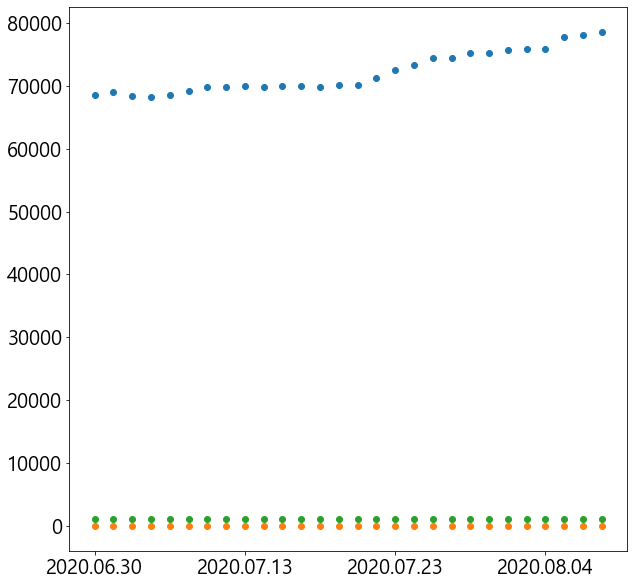

In [22]:
plt.scatter(df['일자'], df['금값'])
plt.scatter(df['일자'], df['은값'])
plt.scatter(df['일자'], df['달러 환율'])
plt.xticks(df['일자'].iloc[::8])

array([[<AxesSubplot:xlabel='금값', ylabel='금값'>,
        <AxesSubplot:xlabel='은값', ylabel='금값'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='금값'>],
       [<AxesSubplot:xlabel='금값', ylabel='은값'>,
        <AxesSubplot:xlabel='은값', ylabel='은값'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='은값'>],
       [<AxesSubplot:xlabel='금값', ylabel='달러 환율'>,
        <AxesSubplot:xlabel='은값', ylabel='달러 환율'>,
        <AxesSubplot:xlabel='달러 환율', ylabel='달러 환율'>]], dtype=object)

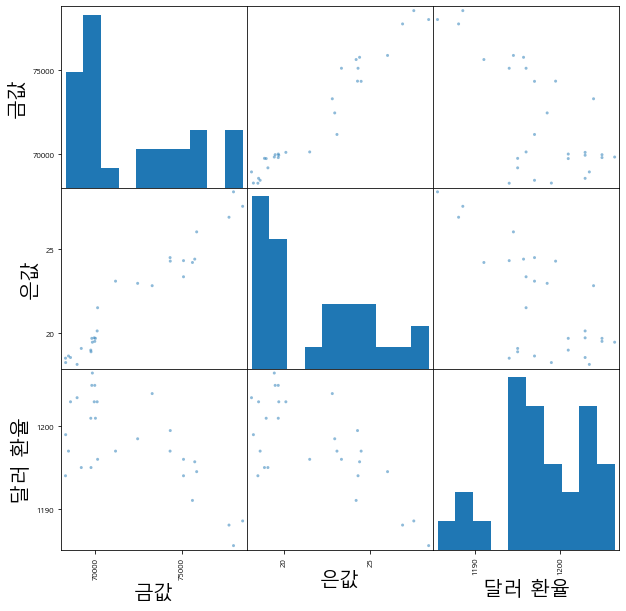

In [23]:
pd.plotting.scatter_matrix(df.drop('일자', axis = 1))

In [24]:
print(pearsonr(df['금값'], df['은값']))
print(pearsonr(df['금값'], df['달러 환율']))
print(pearsonr(df['은값'], df['달러 환율']))

(0.9718640116033498, 7.508878356556557e-18)
(-0.6793266264341937, 7.033325258452259e-05)
(-0.6954569556203559, 3.989042061957972e-05)


In [25]:
import itertools # 2개씩 골라서 하기 위해
target_columns = ['금값', '은값', '달러 환율']
for col1, col2 in itertools.combinations(target_columns, 2):
    result = spearmanr(df[col1], df[col2])
    print("{} ~ {}: coef:{}, p-value: {}".format(col1, col2, result[0], result[1]))

금값 ~ 은값: coef:0.9711235892228813, p-value: 1.0481280432981455e-17
금값 ~ 달러 환율: coef:-0.5039075855936102, p-value: 0.006257468267109453
은값 ~ 달러 환율: coef:-0.528106006718531, p-value: 0.003869997604824081


In [26]:
df.drop('일자', axis = 1).corr(method = 'spearman')

,금값,은값,달러 환율
금값,1.000000,0.971124,-0.503908
은값,0.971124,1.000000,-0.528106
달러 환율,-0.503908,-0.528106,1.000000


### 카이제곱검정

In [27]:
df = pd.read_csv("성별에따른만족도.csv", engine = "python")
df.head()

,만족도,성별
0,불만족,남성
1,보통,여성
2,불만족,여성
3,보통,남성
4,만족,여성


In [28]:
cross_table = pd.crosstab(df['만족도'], df['성별'])
cross_table

성별,남성,여성
만족도,,
만족,50,40
보통,40,30
불만족,10,30


In [29]:
obs = cross_table.values
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue) # 두 변수 간 독립이 아님을 확인

0.001892528960792166


In [30]:
pd.DataFrame(expected, columns = cross_table.columns, index = cross_table.index)

성별,남성,여성
만족도,,
만족,45.0,45.0
보통,35.0,35.0
불만족,20.0,20.0
